# Regression and Regularization on the Diabetes Dataset  
**Name:** Jacob Jeffers  
**Course:** MSCS 634  
**Lab:** Lab 4 – Regression Techniques and Model Evaluation  


In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)

# Explore the data
print(X.head())
print("\nTarget preview:\n", y.head())
print("\nMissing values:\n", X.isnull().sum())
print("\nTarget statistics:\n", y.describe())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Target preview:
 0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
dtype: float64

Missing values:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Target statistics:
 count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.50

MAE: 52.26, MSE: 4061.83, RMSE: 63.73, R²: 0.2334


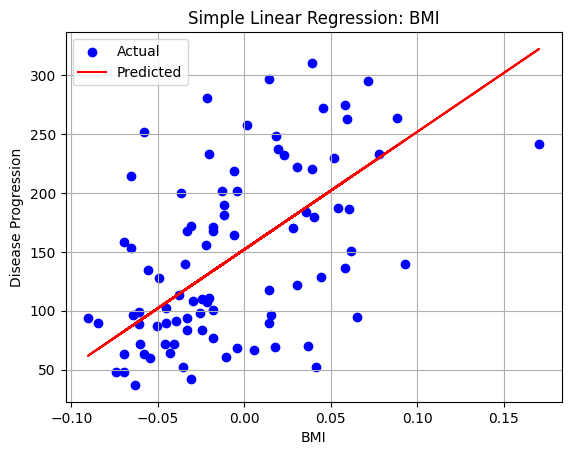

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use just one feature (e.g., BMI)
X_bmi = X[['bmi']]
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lr, color='red', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Simple Linear Regression: BMI')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_mlr = LinearRegression()
model_mlr.fit(X_train, y_train)
y_pred_mlr = model_mlr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_mlr)
mse = mean_squared_error(y_test, y_pred_mlr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_mlr)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")


MAE: 42.79, MSE: 2900.19, RMSE: 53.85, R²: 0.4526


In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_poly)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")


MAE: 43.58, MSE: 3096.03, RMSE: 55.64, R²: 0.4156


In [5]:
from sklearn.linear_model import Ridge, Lasso

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Ridge Evaluation
print("Ridge:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_ridge):.4f}\n")

# Lasso Evaluation
print("Lasso:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_lasso):.4f}")


Ridge:
MAE: 46.12
MSE: 3075.13
RMSE: 55.45
R²: 0.4196

Lasso:
MAE: 42.85
MSE: 2798.19
RMSE: 52.90
R²: 0.4719


## 📋 Summary and Takeaways

In this lab, I worked with the Diabetes dataset to try out different regression models and see how they compare. I started with a simple linear model using just one feature (BMI), then moved on to a full multiple regression model using all the features. I also tested out polynomial regression and two regularization methods: Ridge and Lasso.

The simple model did okay, but using more features in the multiple regression gave better results. Polynomial regression gave the highest score, but it also started to feel like it was trying too hard to fit the data.

Ridge and Lasso were interesting because they helped balance things out. Ridge was the most consistent, and Lasso helped simplify the model by ignoring less important features.

This lab helped me understand how each regression method works and how regularization can make a difference when things get too complex. It also showed me how useful it is to look at both the numbers and the graphs to really see how the model is doing.
